Data visualisation, preparation and feature extraction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing modules to use
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/players_20.csv')

In [ ]:
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [ ]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [ ]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [ ]:
df = df.drop(df.iloc[:,0:6], axis=1)
df

,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,...,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,N

In [ ]:
df = df.drop(df.iloc[:,2:4],axis=1)
df

,height_cm,weight_kg,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,170,72,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,187,83,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,175,68,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,188,87,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,175,74,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,186,79,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,...,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,177,66,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,

In [ ]:
df= df.drop(df.iloc[:,4:6],axis=1)
df

,height_cm,weight_kg,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,170,72,94,94,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,187,83,93,93,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,175,68,92,92,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,188,87,91,93,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,175,74,91,91,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,186,79,48,56,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,...,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,177,66,48,56,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,...,42,49,23,25,37

In [ ]:
df=df.drop(df.iloc[:,11:21],axis=1)
df

,height_cm,weight_kg,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,170,72,94,94,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,187,83,93,93,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,175,68,92,92,"LW, CAM",Right,5,5,5,High/Medium,Neymar,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,188,87,91,93,GK,Right,3,3,1,Medium/Medium,Normal,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,175,74,91,91,"LW, CF",Right,4,4,4,High/Medium,Normal,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,186,79,48,56,CB,Right,1,3,2,Medium/High,Normal,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,...,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,177,66,48,56,CB,Right,1,2,2,Medium/Medium,Normal,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,...,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,186,75,48,56,CM,Right,1,2,2,Low/Medium,Lean,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,...,50,45,38,3

In [ ]:
df.columns

Index(['height_cm', 'weight_kg', 'overall', 'potential', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
       'player_traits', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentalit

In [ ]:
df = df.drop(df.iloc[:,58:],axis=1)
df

,height_cm,weight_kg,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,170,72,94,94,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,187,83,93,93,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,175,68,92,92,"LW, CAM",Right,5,5,5,High/Medium,Neymar,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,188,87,91,93,GK,Right,3,3,1,Medium/Medium,Normal,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,175,74,91,91,"LW, CF",Right,4,4,4,High/Medium,Normal,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,186,79,48,56,CB,Right,1,3,2,Medium/High,Normal,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,177,66,48,56,CB,Right,1,2,2,Medium/Medium,Normal,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,186,75,48,56,CM,Right,1,2,2,Low/Medium,Lean,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,185,74,48,54,CM,Right,1,2,2,Low/Low,Lean,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


In [ ]:
df = df.drop('player_traits', axis=1)

In [ ]:
# Checking the missing values in the column
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values.reset_index(drop=False)
missing_values = missing_values.rename(columns={"index": "Columns", 0: "Value"})
missing_values['Proportion'] = (missing_values['Value']/len(df))*100

In [ ]:
samples = missing_values[missing_values['Proportion']>10]
fig = px.pie(samples, names='Columns', values='Proportion',
             color_discrete_sequence=px.colors.sequential.Viridis_r,
             title='Percentage of Missing values in Columns')
fig.update_traces(textposition='inside', textinfo='label')
fig.update_layout(paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(family='Cambria, monospace', size=12, color='#000000'))
fig.show()

In [ ]:
#filling null values
df = df.fillna(df.median())
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   height_cm                   18278 non-null  int64  
 1   weight_kg                   18278 non-null  int64  
 2   overall                     18278 non-null  int64  
 3   potential                   18278 non-null  int64  
 4   player_positions            18278 non-null  object 
 5   preferred_foot              18278 non-null  object 
 6   international_reputation    18278 non-null  int64  
 7   weak_foot                   18278 non-null  int64  
 8   skill_moves                 18278 non-null  int64  
 9   work_rate                   18278 non-null  object 
 10  body_type                   18278 non-null  object 
 11  pace                        18278 non-null  float64
 12  shooting                    18278 non-null  float64
 13  passing                     182

In [ ]:
#encoding

s = (df.dtypes == 'object')
object_cols = list(s[s].index)

In [ ]:
ordinal_encoder = OrdinalEncoder()
df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   height_cm                   18278 non-null  int64  
 1   weight_kg                   18278 non-null  int64  
 2   overall                     18278 non-null  int64  
 3   potential                   18278 non-null  int64  
 4   player_positions            18278 non-null  float64
 5   preferred_foot              18278 non-null  float64
 6   international_reputation    18278 non-null  int64  
 7   weak_foot                   18278 non-null  int64  
 8   skill_moves                 18278 non-null  int64  
 9   work_rate                   18278 non-null  float64
 10  body_type                   18278 non-null  float64
 11  pace                        18278 non-null  float64
 12  shooting                    18278 non-null  float64
 13  passing                     182

In [ ]:
#filling null values with median value
df = df.fillna(df.median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   height_cm                   18278 non-null  int64  
 1   weight_kg                   18278 non-null  int64  
 2   overall                     18278 non-null  int64  
 3   potential                   18278 non-null  int64  
 4   player_positions            18278 non-null  float64
 5   preferred_foot              18278 non-null  float64
 6   international_reputation    18278 non-null  int64  
 7   weak_foot                   18278 non-null  int64  
 8   skill_moves                 18278 non-null  int64  
 9   work_rate                   18278 non-null  float64
 10  body_type                   18278 non-null  float64
 11  pace                        18278 non-null  float64
 12  shooting                    18278 non-null  float64
 13  passing                     182

In [ ]:
#converting to integer
df= df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   height_cm                   18278 non-null  int64
 1   weight_kg                   18278 non-null  int64
 2   overall                     18278 non-null  int64
 3   potential                   18278 non-null  int64
 4   player_positions            18278 non-null  int64
 5   preferred_foot              18278 non-null  int64
 6   international_reputation    18278 non-null  int64
 7   weak_foot                   18278 non-null  int64
 8   skill_moves                 18278 non-null  int64
 9   work_rate                   18278 non-null  int64
 10  body_type                   18278 non-null  int64
 11  pace                        18278 non-null  int64
 12  shooting                    18278 non-null  int64
 13  passing                     18278 non-null  int64
 14  dribbl

In [ ]:
#extracting and storing list of features to work with
columns = [i for i in df]
columns

['height_cm',
 'weight_kg',
 'overall',
 'potential',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defen

In [ ]:
df = df[columns]
df


,height_cm,weight_kg,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,170,72,94,94,544,0,5,4,4,7,4,87,92,92,96,39,66,65,63,61,66,39,64,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,187,83,93,93,620,1,5,4,5,1,1,90,93,82,89,35,78,65,63,61,66,39,64,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,175,68,92,92,344,1,5,5,5,2,5,91,85,87,95,32,58,65,63,61,66,39,64,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,188,87,91,93,226,1,3,3,1,8,6,69,54,58,64,56,66,87,92,78,89,52,90,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,175,74,91,91,350,1,4,4,4,2,6,91,83,86,94,35,66,65,63,61,66,39,64,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,186,79,48,56,55,1,1,3,2,6,6,57,23,28,33,47,51,65,63,61,66,39,64,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,177,66,48,56,55,1,1,2,2,8,6,58,24,33,35,48,48,65,63,61,66,39,64,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,186,75,48,56,155,1,1,2,2,5,3,54,35,44,45,48,51,65,63,61,66,39,64,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,185,74,48,54,155,1,1,2,2,4,3,59,35,47,47,45,52,65,63,61,66,39,64,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


In [ ]:
y = df['overall']
X = df.drop('overall', axis=1)

In [ ]:
#scaling X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#splitting data into training and evaluation set
train_X,val_X,train_y,val_y = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

CORRELATION

In [ ]:
corr_test = df.copy()
correlation_matrix = corr_test.corr()
correlation_matrix['overall'].sort_values(ascending=False)

overall                       1.000000
movement_reactions            0.864526
mentality_composure           0.719992
potential                     0.646650
passing                       0.632743
power_shot_power              0.567504
dribbling                     0.553792
mentality_vision              0.509251
attacking_short_passing       0.503157
skill_long_passing            0.487289
physic                        0.476817
international_reputation      0.475557
shooting                      0.458698
skill_ball_control            0.457052
power_long_shots              0.425081
skill_curve                   0.415521
skill_moves                   0.401261
mentality_aggression          0.399434
attacking_volleys             0.394152
skill_fk_accuracy             0.389790
attacking_crossing            0.389078
skill_dribbling               0.370639
power_stamina                 0.370344
power_strength                0.361543
mentality_positioning         0.356025
gk_positioning           

In [ ]:
corr_features = ['overall','movement_reactions', 'mentality_composure','potential','passing','power_shot_power','dribbling','mentality_vision','attacking_short_passing',]

In [ ]:
df = df[corr_features]

In [ ]:
corr_chosen = corr_test[corr_features]
correlation_matrixx = corr_chosen.corr()
correlation_matrixx.style.background_gradient(cmap='coolwarm')

,overall,movement_reactions,mentality_composure,potential,passing,power_shot_power,dribbling,mentality_vision,attacking_short_passing
overall,1.000000,0.864526,0.719992,0.646650,0.632743,0.567504,0.553792,0.509251,0.503157
movement_reactions,0.864526,1.000000,0.694967,0.517508,0.582387,0.523219,0.507197,0.517061,0.499506
mentality_composure,0.719992,0.694967,1.000000,0.444101,0.544632,0.616498,0.455707,0.650544,0.717620
potential,0.646650,0.517508,0.444101,1.000000,0.394475,0.349043,0.416720,0.348782,0.366478
passing,0.632743,0.582387,0.544632,0.394475,1.000000,0.599154,0.829963,0.751446,0.542911
power_shot_power,0.567504,0.523219,0.616498,0.349043,0.599154,1.000000,0.592508,0.674526,0.576883
dribbling,0.553792,0.507197,0.455707,0.416720,0.829963,0.592508,1.000000,0.676188,0.401787
mentality_vision,0.509251,0.517061,0.650544,0.348782,0.751446,0.674526,0.676188,1.000000,0.705144
attacking_short_passing,0.503157,0.499506,0.717620,0.366478,0.542911,0.576883,0.401787,0.705144,1.000000


In [ ]:
#splitting the correlated features to train the model
X = df.drop('overall',axis=1)
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size=0.2,random_state=42)

TRAINING THE MODEL AND TUNING IT

In [ ]:
#Training and predicting using a random forest model as well as measuring the performance using MAE
model = RandomForestRegressor(n_estimators=1)
model.fit(train_X, train_y)
preds = model.predict(val_X)
print(mean_absolute_error(val_y, preds))


2.174781181619256


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [50,100,500], 'max_features': [2, 8,10,50, 100],'random_state':[50, 100,200,],
 'max_depth':[20, 50, 100, 500,],
},

]
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(train_X, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


540 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [20, 50, 100, 500],
                          'max_features': [2, 8, 10, 50, 100],
                          'n_estimators': [50, 100, 500],
                          'random_state': [50, 100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 2, 8,10,50, 100, 200, 500,],
    'min_samples_split': [2, 4, 6],
    'max_depth':[20, 50, 100, 500]
}

In [ ]:
grid_search.best_params_

{'max_depth': 20, 'max_features': 2, 'n_estimators': 500, 'random_state': 100}

In [ ]:
#Fine tuning the model
model = RandomForestRegressor(random_state=100,n_estimators=500,min_samples_leaf=20,max_depth=20,max_features=2,)
model.fit(train_X, train_y)
preds = model.predict(val_X)

In [ ]:
#tuned model mean absolute error
print(mean_absolute_error(val_y, preds))

1.640675896437883


In [ ]:
preds

array([64.28096854, 73.86933617, 70.84671451, ..., 59.32266666,
       55.89914631, 67.91544713])

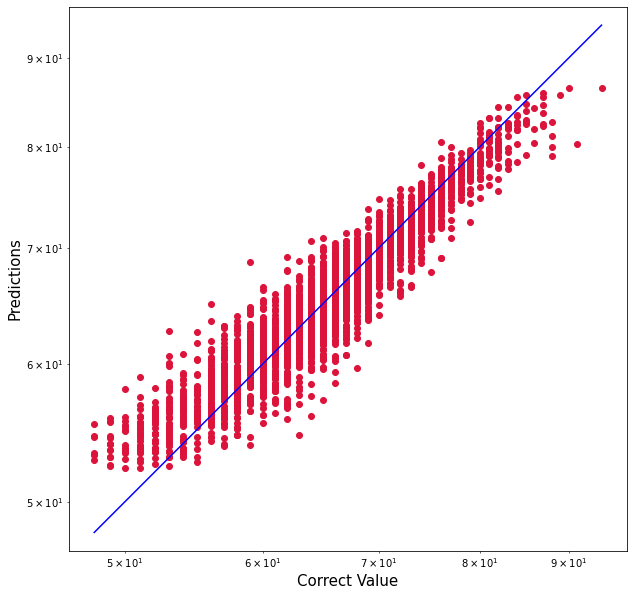

In [ ]:
#graph showing the predicted values plotted against the correct values

plt.figure(figsize=(10,10))
plt.scatter(val_y, preds, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(preds), max(val_y))
p2 = min(min(preds), min(val_y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Correct Value', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Predicting from another season Fifa21


In [ ]:
#reading the FIFA21 dataset
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIFA21_official_data.csv')

In [ ]:
df1.head(5)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17108 non-null  int64  
 1   Name                      17108 non-null  object 
 2   Age                       17108 non-null  int64  
 3   Photo                     17108 non-null  object 
 4   Nationality               17108 non-null  object 
 5   Flag                      17108 non-null  object 
 6   Overall                   17108 non-null  int64  
 7   Potential                 17108 non-null  int64  
 8   Club                      16783 non-null  object 
 9   Club Logo                 17108 non-null  object 
 10  Value                     17108 non-null  object 
 11  Wage                      17108 non-null  object 
 12  Special                   17108 non-null  int64  
 13  Preferred Foot            17108 non-null  object 
 14  Intern

In [ ]:
#selecting the features that match my model features
columns = ['Best Overall Rating','Reactions','Composure','Potential','ShortPassing','ShotPower','Dribbling','Vision','LongPassing']

In [ ]:
df1 = df1[columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Best Overall Rating  17108 non-null  float64
 1   Reactions            17108 non-null  float64
 2   Composure            16821 non-null  float64
 3   Potential            17108 non-null  int64  
 4   ShortPassing         17108 non-null  float64
 5   ShotPower            17108 non-null  float64
 6   Dribbling            17108 non-null  float64
 7   Vision               17069 non-null  float64
 8   LongPassing          17108 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
#filling null values
df1 = df1.fillna(df1.median())

In [ ]:
y_pred = df1['Best Overall Rating']
X_pred = df1.drop('Best Overall Rating',axis=1)

In [ ]:
#predicting the values using the modified model
pred = model.predict(X_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Composure
- Dribbling
- LongPassing
- Potential
- Reactions
- ...
Feature names seen at fit time, yet now missing:
- attacking_short_passing
- dribbling
- mentality_composure
- mentality_vision
- movement_reactions
- ...




In [ ]:
#calculating mean absolute error on the results from the prediction of FIFA21 dataset
mean_absolute_error(y_pred, pred)

1.881616814743304